# Processamento de Áudio com Python

In [1]:
# imports
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt

import scipy.io.wavfile as wavf

import DSP

In [2]:
""" tonegen
@brief: Gera um tom

@vars
freq:   Frequência do tom
lenght: Duração do tom em segundos
ampli:  Amplitude do tom
fs:     Frequência de Amostragem
"""
def tonegen(freq, lenght, ampli, fs):
    fd = (2*np.pi*freq)/fs # Frequência digital do sinal
    n  = np.arange(0, np.ceil(fs*lenght)) # vai de 0 à 'lenght'
    ###
    tone = ampli*np.sin(fd*n)
    return [tone, n]

""" DTMF Generator
@brief:    Classe que gera tom no padrão DTMF

@vars
tone_lenght:    Duração do tom de cada dígito
digit_spacing:  Intervalo entre cada dígito em segundos
amplitude:      Amplitude do sinal
sampling_freq:  Frequência de amostragem
T:              Período de Amostragem
"""
class DTMF_Generator:
    def __init__(self, tone_lenght, digit_spacing, amplitude, sampling_freq):
        self.tone_lenght    = tone_lenght
        self.digit_spacing  = digit_spacing
        self.amplitude      = amplitude
        self.sampling_freq  = sampling_freq
        self.T              = 1/sampling_freq
    # Gera delay entre os dígitos
    def get_delay(self):
        delay   = np.zeros(int(np.ceil(self.digit_spacing*self.sampling_freq)))
        return delay
    # Gera tom (Copiado de tonegen)
    def tonegen(self, freq):
        fd = (2*np.pi*freq)*self.T # Frequência digital do sinal
        n  = np.arange(0, np.ceil(self.sampling_freq*self.tone_lenght)) # vai de 0 à 'lenght'
        ###
        tone = self.amplitude*np.sin(fd*n)
        return tone
    # Gera tom do dígito
    def get_tone(self, digit):
        dig_tone    = self.tonegen(tone_f1[digit]) + self.tonegen(tone_f2[digit])
        return dig_tone
    # Concatenta um sinal e o exporta (Se especificado)
    # digit_seq é a sequencia de dígitos (array de str)
    def generate_dtmf(self, digit_seq, filename=None):
        dtmf = self.get_delay()
        for digit in digit_seq:
            dtmf = np.append(dtmf, self.get_tone(digit))
            dtmf = np.append(dtmf, self.get_delay())
        if (filename):
            wavf.write(filename, int(self.sampling_freq), dtmf)
        n = np.arange(0, len(dtmf))

        return [dtmf, n]

tone_f1 = {
    '1': 1209,
    '2': 1336,
    '3': 1477,
    'A': 1632,
    '4': 1209,
    '5': 1336,
    '6': 1477,
    'B': 1632,
    '7': 1209,
    '8': 1336,
    '9': 1477,
    'C': 1632,
    '*': 1209,
    '0': 1336,
    '#': 1477,
    'D': 1632,
}

tone_f2 = {
    '1': 697,
    '2': 697,
    '3': 697,
    'A': 697,
    '4': 770,
    '5': 770,
    '6': 770,
    'B': 770,
    '7': 852,
    '8': 852,
    '9': 852,
    'C': 852,
    '*': 941,
    '0': 941,
    '#': 941,
    'D': 941,
}


In [3]:
dtmf_gen = DTMF_Generator(40e-3, 0.1, 0.7, 8e3)
dtmf_seq = dtmf_gen.generate_dtmf(['9', '8', '1', 'A'], "Sinais/dtmf.wav")

In [4]:
[tone_220, n] = tonegen(220, 5, 0.6, 1e3)
DSP.write_wav("Sinais/tom_220.wav", 1000, tone_220)
half_tone_220 = DSP.halfsp(tone_220)
DSP.write_wav("Sinais/half_tom_220.wav", 1000, half_tone_220)
double_tone_220 = DSP.doublesp(tone_220)
DSP.write_wav("Sinais/double_tom_220.wav", 1000, double_tone_220)

Resultado em frequência: 'halfsp' parece dobrar a frequência e 'doublesp' claramente adiciona mais uma frequência que parece ter metade do valor da original.

Resultado no tempo, olhando para o resultado de 'halfsp' podemos ver que parece ter um "batimento" e a onda está levemente distorcida. Já o resultado de 'doublesp' distorce o sinal moderadamente, podemos observar que cada sequência de três pontos forma uma linha reta e podemos ouvir um segundo tom distinto com frequência mais baixa que o original.

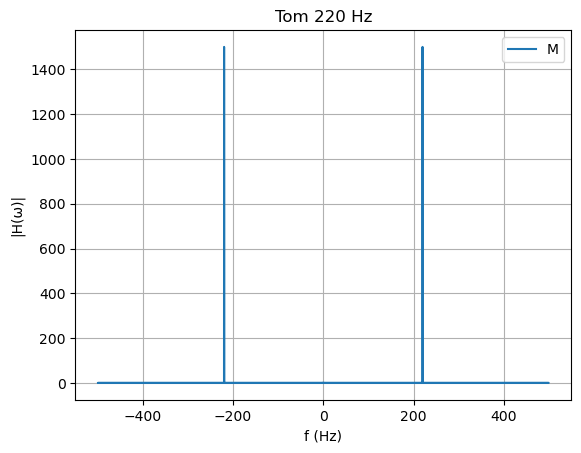

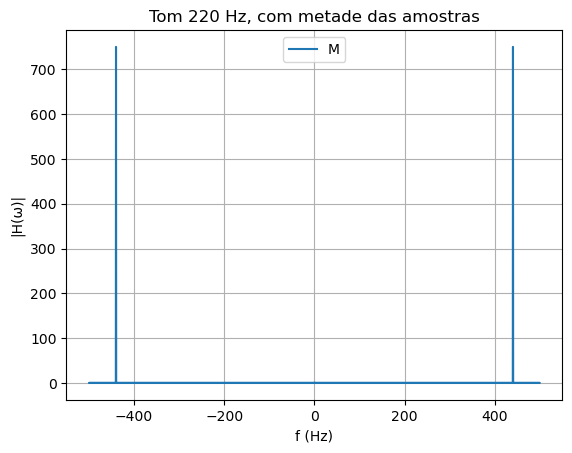

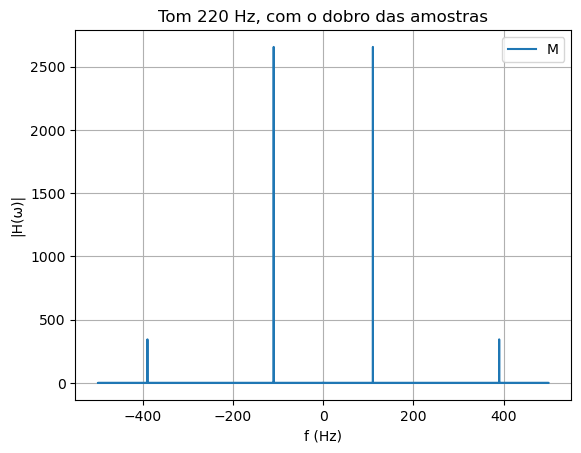

In [5]:
H_tone_220          = np.fft.fft(tone_220)
H_half_tone_220     = np.fft.fft(half_tone_220)
H_double_tone_220   = np.fft.fft(double_tone_220)

w           = np.fft.fftfreq(len(tone_220), 1e-3)
w_half      = np.fft.fftfreq(len(half_tone_220), 1e-3)
w_double    = np.fft.fftfreq(len(double_tone_220), 1e-3)

DSP.Plot_Fourier([H_tone_220, w], title = "Tom 220 Hz")
DSP.Plot_Fourier([H_half_tone_220, w_half], title = "Tom 220 Hz, com metade das amostras")
DSP.Plot_Fourier([H_double_tone_220, w_double], title = "Tom 220 Hz, com o dobro das amostras")

In [12]:
[fs, raw_voice]     = DSP.read_wav("Sinais/Frase_Teste.wav")
raw_voice           = DSP.normalize(raw_voice)

half_voice          = DSP.halfsp(raw_voice)
double_voice        = DSP.doublesp(raw_voice)
raw_voice2d         = np.array([raw_voice, raw_voice])  # Convert to stereo
fliplr_voice        = np.fliplr(raw_voice2d)
flipud_voice        = np.flipud(raw_voice2d)

DSP.write_wav("Sinais/half_voice.wav", fs, half_voice)
DSP.write_wav("Sinais/double_voice.wav", fs, double_voice)
DSP.write_wav("Sinais/fliplr_voice.wav", fs, fliplr_voice[0, :])    # Convert back to mono
DSP.write_wav("Sinais/flipud_voice.wav", fs, flipud_voice[0, :])    # Convert back to mono

In [13]:
[fs, tunnel_IR]     = DSP.read_wav("Sinais/middle_tunnel_4way_mono.wav")
[fs, room_IR]       = DSP.read_wav("Sinais/Resposta_ao_impulso_quarto.wav")

raw_voice = raw_voice[0:len(raw_voice)//4] # Se não reduzir tamanho, demora demais

In [14]:
# Normalizando Sinais
tunnel_IR_norm      = tunnel_IR.astype(float)/np.max(np.abs(tunnel_IR.astype(float)))
raw_voice_norm      = raw_voice.astype(float)/np.max(np.abs(raw_voice.astype(float)))
room_IR_norm        = room_IR.astype(float)/np.max(np.abs(room_IR.astype(float)))

#### Deconvoluindo sinal => Muito lento, não sei se está certo
[clean_voice, remainder] = sp.deconvolve(raw_voice_norm, room_IR_norm[16:])

c:\Users\emanuel\anaconda3\Lib\site-packages\scipy\signal\_signaltools.py:2293: RuntimeWarning: Use of fft convolution on input with NAN or inf results in NAN or inf output. Consider using method='direct' instead.
  rem = num - convolve(den, quot, mode='full')


In [15]:
clean_voice_norm = (clean_voice[:579])/np.max(np.abs(clean_voice[:579]))
clean_voice_in_tunnel = np.convolve(clean_voice_norm, tunnel_IR_norm, mode='full')
clean_voice_in_tunnel = clean_voice_in_tunnel/np.max(np.abs(clean_voice_in_tunnel))
DSP.write_wav("Sinais/Voz no tunel - Limpa.wav", 96000, clean_voice_in_tunnel)

In [16]:
voice_in_tunnel = np.convolve(raw_voice_norm, tunnel_IR_norm)
voice_in_tunnel = voice_in_tunnel/np.max(np.abs(voice_in_tunnel))
DSP.write_wav("Sinais/Voz no tunel.wav", 96000, voice_in_tunnel)

In [17]:
np.max(voice_in_tunnel)

1.0